In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import ipywidgets as widgets
import numpy as np

In [4]:
prefix = 'simple_6_'
df = pd.read_csv(f'results/{prefix}semstamp_sentence.csv')
df

,P,Num,Origin,simple_6_A_normal,simple_6_B_normal,simple_6_A_flipped,simple_6_B_flipped,simple_6_A_count,simple_6_B_count,simple_6_choice,simple_6_flipped_choice
0,Evan strolled into the charming café on Rue Cl...,0,A,0.8,0.2,0.2,0.8,0.5,0.5,B,A
1,Evan strolled along the charming streets of Mo...,0,B,1.0,0.0,0.2,0.8,0.6,0.4,A,A
2,Evan strolled into the charming café on Rue Cl...,1,A,0.8,0.2,0.2,0.8,0.5,0.5,B,A
3,Evan strolled along the charming streets of Mo...,1,B,0.8,0.2,0.4,0.6,0.6,0.4,A,A
4,Evan strolled into the charming café on Rue Cl...,2,A,0.6,0.4,0.2,0.8,0.4,0.6,B,B
...,...,...,...,...,...,...,...,...,...,...,...
225,As he wandered through the picturesque streets...,112,B,1.0,0.0,0.6,0.4,0.8,0.2,A,A
226,"Evan ducked into the quaint Rue Cler café, esc...",113,A,0.8,0.2,0.4,0.6,0.6,0.4,A,A
227,As he wandered through the picturesque streets...,113,B,1.0,0.0,0.2,0.8,0.6,0.4,A,A
228,"Evan ducked into the quaint Rue Cler café, esc...",114,A,0.6,0.4,0.2,0.8,0.4,0.6,B,B


In [5]:
def summary(prefix=""):
    df[f'{prefix}correct'] = (df['Origin'] == df[f'{prefix}choice']).astype(float)
    df[f'{prefix}flipped_correct'] = (df['Origin'] == df[f'{prefix}flipped_choice']).astype(float)
    df[f'{prefix}avg_correct'] = (df[f'{prefix}correct']+df[f'{prefix}flipped_correct'])/2
    print(f"Correct: {df[f'{prefix}correct'].mean()}, Flipped Correct: {df[f'{prefix}flipped_correct'].mean()}, Avg Correct: {df[f'{prefix}avg_correct'].mean()}")

summary(prefix)

Correct: 0.40869565217391307, Flipped Correct: 0.47391304347826085, Avg Correct: 0.44130434782608696


In [4]:
dropdown = widgets.Dropdown(
    options=['avg_correct', 'correct', 'flipped_correct'],
    value='avg_correct',
    description='Statistic:',
)

origin = widgets.Dropdown(
    options=['A', 'B', 'Both'],
    value='Both',
    description='Origin:',
)

slider = widgets.IntSlider(min=1, max=20, step=1, value=1, description='Window:')

def plot(prefix=""):
    match origin.value:
        case 'A':
            data = df[df['Origin'] == 'A'][f'{prefix}{dropdown.value}'].reset_index(drop=True)
            # fall through
        case 'B':
            data = df[df['Origin'] == 'B'][f'{prefix}{dropdown.value}'].reset_index(drop=True)
        case 'Both':
            tmp1 = df[df['Origin'] == 'A'][f'{prefix}{dropdown.value}'].reset_index(drop=True)
            tmp2 = df[df['Origin'] == 'B'][f'{prefix}{dropdown.value}'].reset_index(drop=True)
            data = (tmp1+tmp2)/2
    
    rolling_mean = data.rolling(window=slider.value).mean()
    plt.title(f'{prefix}{dropdown.value} (window={slider.value}, origin={origin.value})')
    plt.xlabel('Mutation number')
    plt.ylabel('Accuracy')
    plt.ylim(-0.1, 1.1)
    plt.yticks([0, 0.5, 1])
    plt.plot(rolling_mean, color='orange')
    plt.show()

widgets.interact(lambda x, y, z: plot(prefix), x=dropdown, y=slider, z=origin)

interactive(children=(Dropdown(description='Statistic:', options=('avg_correct', 'correct', 'flipped_correct')…

<function __main__.<lambda>(x, y, z)>

10
Correct: 0.87, Flipped Correct: 0.76, Avg Correct: 0.815
11
Correct: 0.8325, Flipped Correct: 0.96, Avg Correct: 0.89625
12
Correct: 0.8225, Flipped Correct: 0.8, Avg Correct: 0.81125
13
Correct: 0.8525, Flipped Correct: 0.6825, Avg Correct: 0.7675
14
Correct: 0.6775, Flipped Correct: 0.8025, Avg Correct: 0.74
15
Correct: 0.8125, Flipped Correct: 0.8725, Avg Correct: 0.8425
16
Correct: 0.735, Flipped Correct: 0.685, Avg Correct: 0.71
17
Correct: 0.7475, Flipped Correct: 0.7325, Avg Correct: 0.74
18
Correct: 0.7475, Flipped Correct: 0.7575, Avg Correct: 0.7525
19
Correct: 0.8475, Flipped Correct: 0.8425, Avg Correct: 0.845
30
Correct: 0.7948717948717948, Flipped Correct: 0.905982905982906, Avg Correct: 0.8504273504273504
31
Correct: 0.9025, Flipped Correct: 0.83, Avg Correct: 0.86625
32
Correct: 0.7625, Flipped Correct: 0.81, Avg Correct: 0.78625
33
Correct: 0.73, Flipped Correct: 0.8725, Avg Correct: 0.80125
34
Correct: 0.9198473282442748, Flipped Correct: 0.8053435114503816, Avg Co

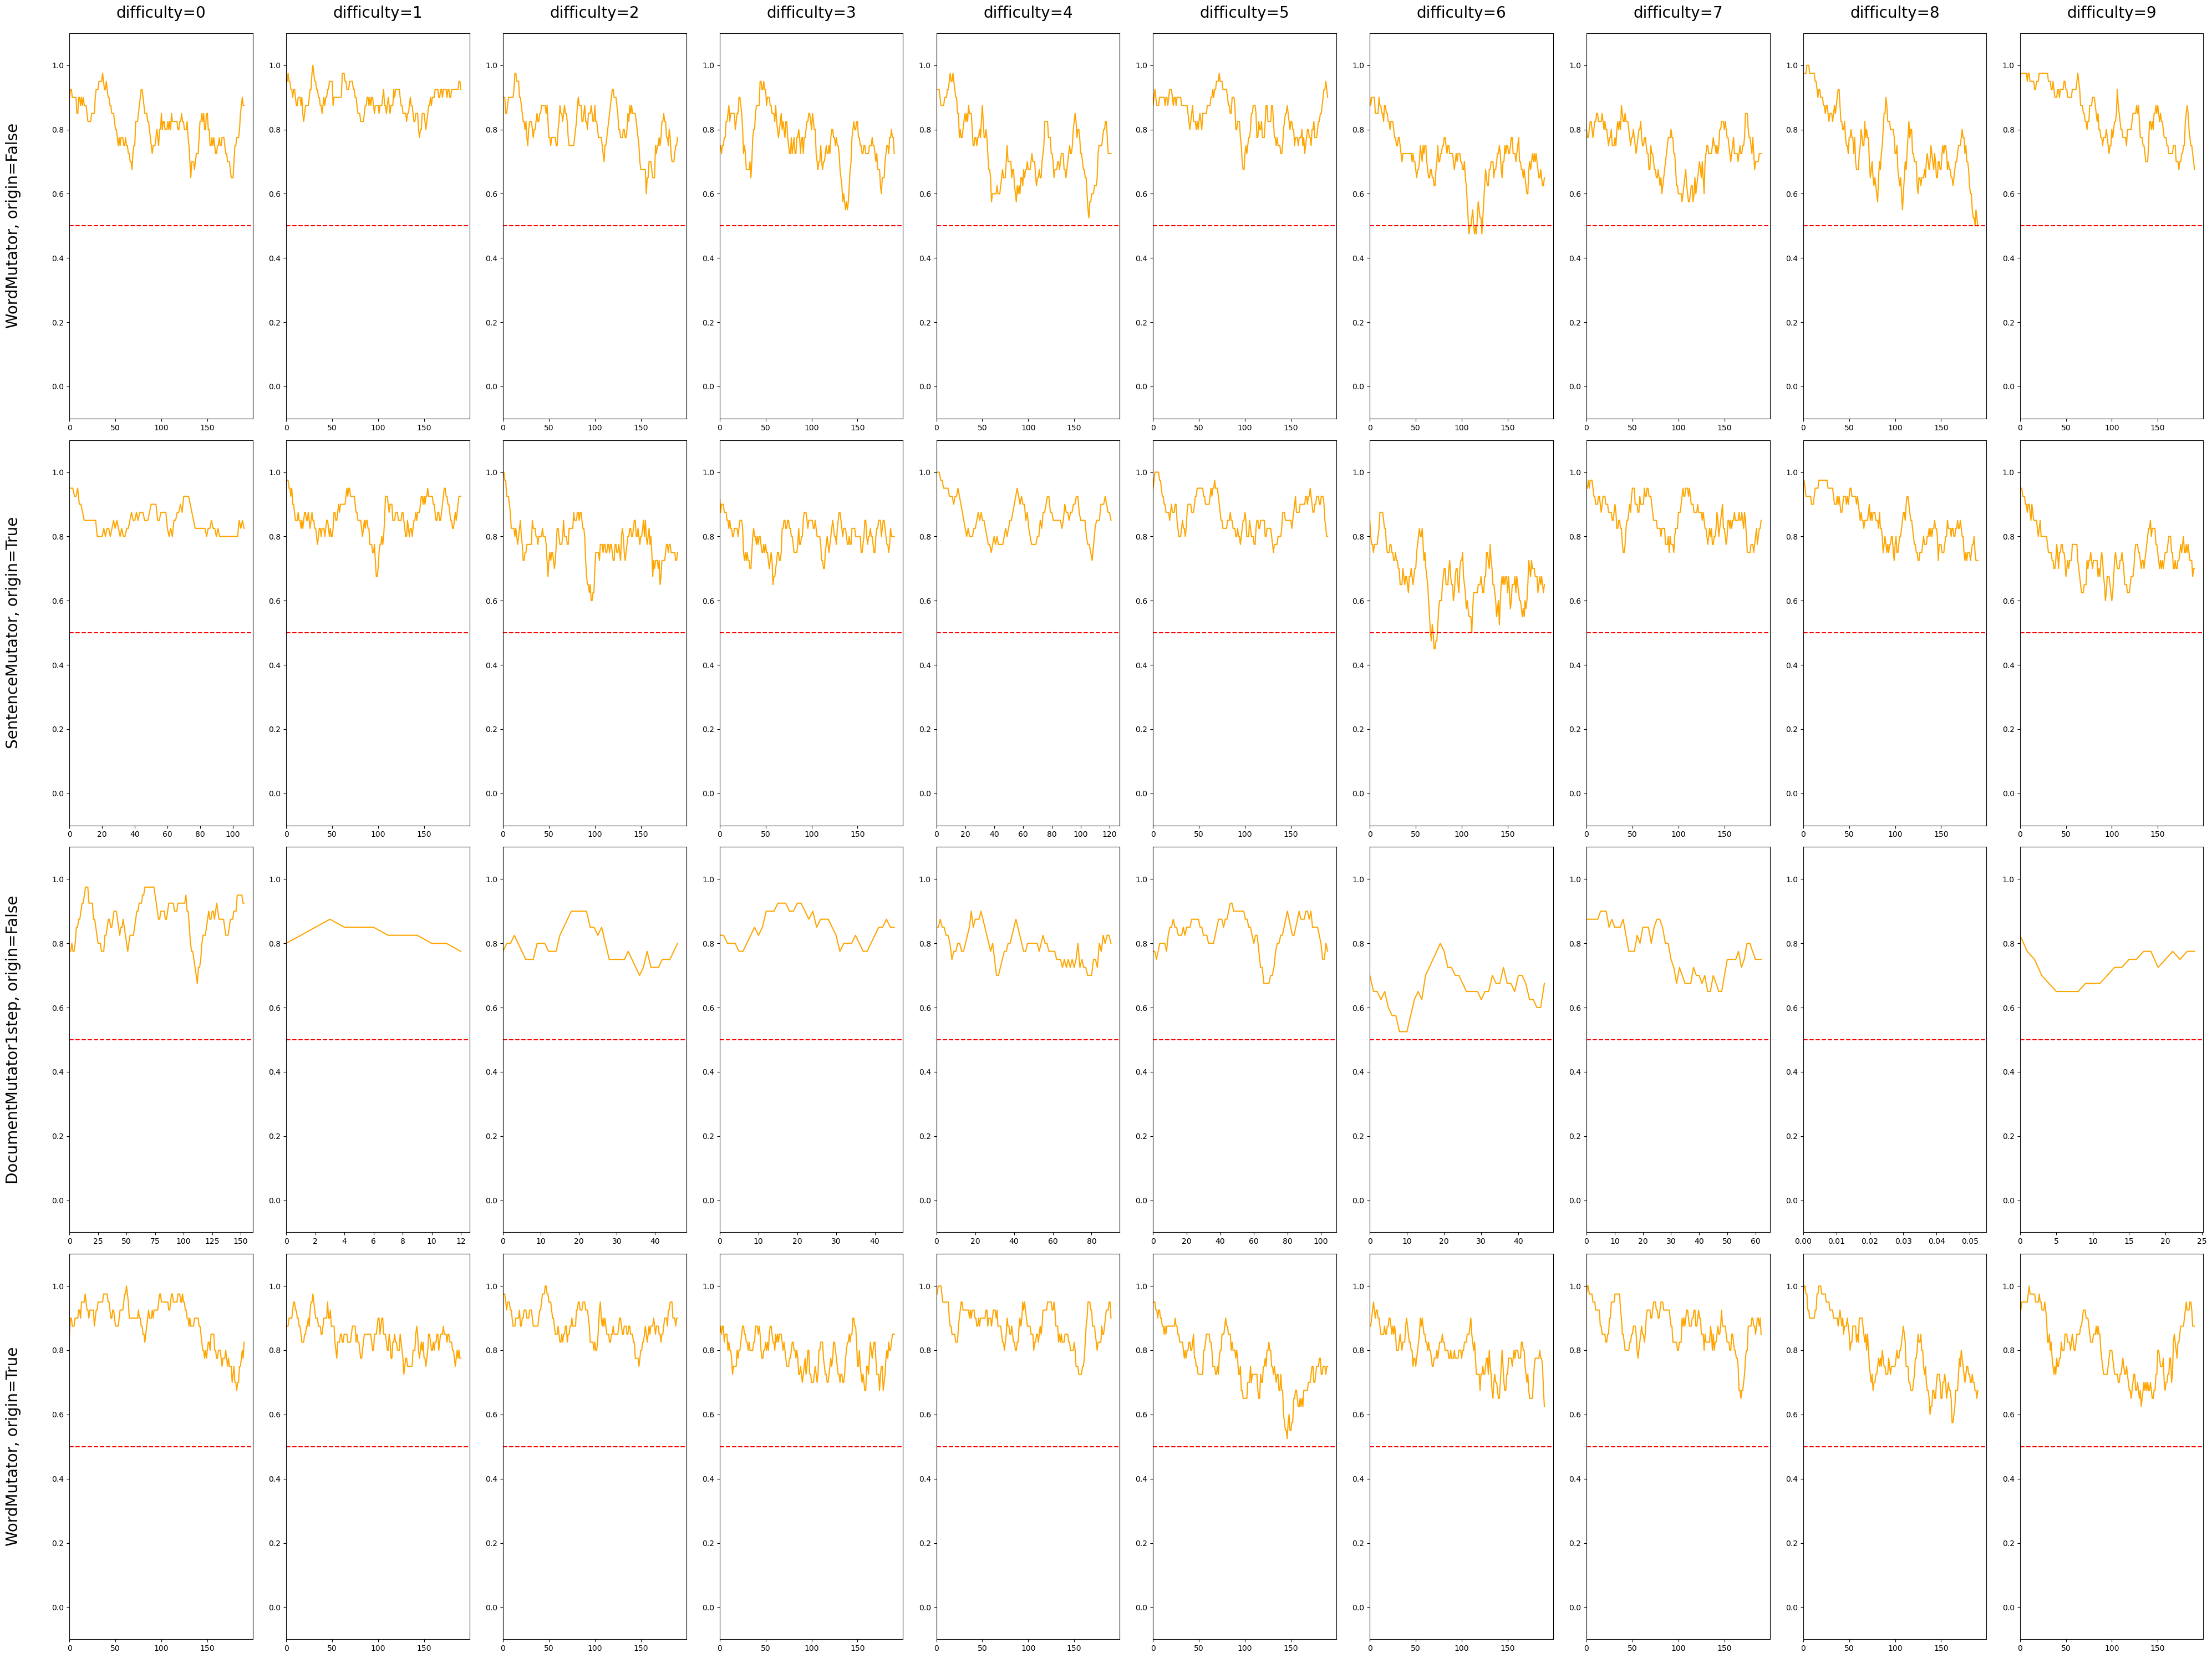

In [22]:
experiments = 8
prompts = 10
trials = experiments * prompts

n_rows = [1,3,4,7]
n_cols = [0,1,2,3,4,5,6,7,8,9]

fig, axes = plt.subplots(len(n_rows), len(n_cols), figsize=(40, 30))

tdf = pd.read_csv(f'results/stationary_distribution_full.csv')

def summary(df, prefix=""):
    df[f'{prefix}correct'] = (df['Origin'] == df[f'{prefix}choice']).astype(float)
    df[f'{prefix}flipped_correct'] = (df['Origin'] == df[f'{prefix}flipped_choice']).astype(float)
    df[f'{prefix}avg_correct'] = (df[f'{prefix}correct']+df[f'{prefix}flipped_correct'])/2
    print(f"Correct: {df[f'{prefix}correct'].mean()}, Flipped Correct: {df[f'{prefix}flipped_correct'].mean()}, Avg Correct: {df[f'{prefix}avg_correct'].mean()}")

for i in range(trials):
    t_row = i // prompts
    t_col = i % prompts
    if t_row not in n_rows or t_col not in n_cols:
        continue
    row = n_rows.index(t_row)
    col = n_cols.index(t_col)
    df = tdf[tdf['id'] == i].copy(deep=True)
    print(i)
    summary(df)
    tmp1 = df[df['Origin'] == 'A']['avg_correct'].reset_index(drop=True)
    tmp2 = df[df['Origin'] == 'B']['avg_correct'].reset_index(drop=True)
    data = (tmp1+tmp2)/2
    window = 10
    rolling_mean = data.rolling(window=window).mean()[window-1:].reset_index()
    axes[row, col].plot(rolling_mean, color='orange')
    if row == 0:
        axes[row, col].set_title(f'difficulty={df.iloc[0]["entropy"]}', fontsize=20, pad=20)
    if col == 0:
        axes[row, col].set_ylabel(f'{df.iloc[0]["m_str"]}, origin={df.iloc[0]["compare_against_original"]}', fontsize=20, labelpad=40)
    axes[row, col].axhline(y=0.5, color='red', linestyle='--')
    axes[row,col].set_ylim(-0.1, 1.1)
    axes[row,col].set_xlim(0, None)

plt.tight_layout()
plt.show()
